# Titanic Data: Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder # 1-hot encoding (Categorical --> Binary Hot Encoding)
from sklearn.model_selection import train_test_split #train test split
from sklearn.linear_model import LogisticRegression #Call the model
from sklearn.metrics import accuracy_score,precision_score, recall_score #accuracy, precision and recall metric
from sklearn.model_selection import cross_val_score #validation
from sklearn.metrics import classification_report

In [3]:
df_titanic = pd.read_csv('train.csv')

In [4]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Exploratory Data Analysis

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Identify the missing values

In [7]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_titanic.isna().sum()/len(df_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Handling the age column

In [9]:
def impute_age(col):
    Age = col[0] #to select the column for imputation
    Pclass=col[1]
    if pd.isnull(Age):
        return (df_titanic[df_titanic['Pclass']==Pclass]['Age'].mean())
    else:
        return Age

In [10]:
df_titanic_sub=df_titanic[['Age', 'Pclass']]

In [11]:
df_titanic_sub

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [12]:
df_titanic['Age'] =df_titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

In [13]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling the cabin column

In [15]:
df_titanic.drop('Cabin', inplace=True, axis=1)

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
df_titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [18]:
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [20]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Examine the distribution of Target Column

In [22]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

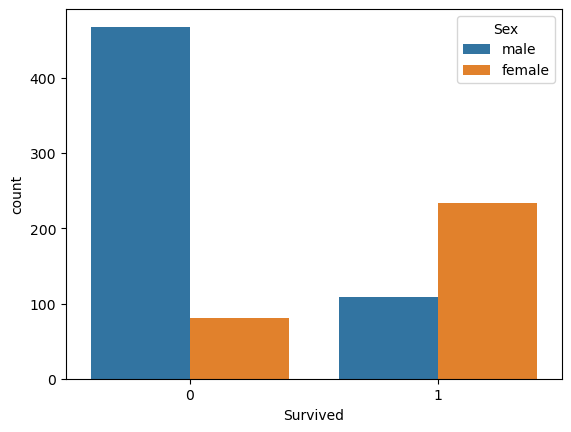

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.show()

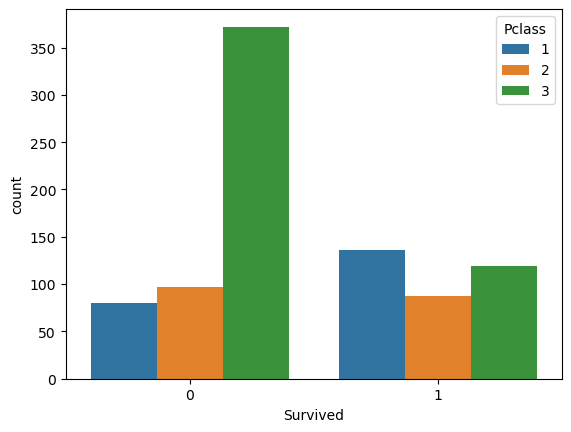

In [24]:
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
plt.show()

In [25]:
df_titanic.groupby(['Survived','Pclass']).agg(Total_Count=('Pclass', 'count')).reset_index()

,Survived,Pclass,Total_Count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


In [26]:
df_titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Encoding Categorical Variables

In [27]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix = col_name)
    df = pd.concat([df, dummies], axis=1)
    return df

In [29]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
for col in ['Pclass',  'Sex', 'Embarked']:
    df_titanic = create_encoding(df_titanic, col)

In [31]:
df_titanic.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925


### Dropping Unnecessary Columns

In [32]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [33]:
df_titanic.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], inplace=True, axis=1)

In [34]:
df_titanic.head(2)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0


In [35]:
df_titanic_survived= df_titanic[df_titanic['Survived']==1]

In [36]:
df_titanic['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

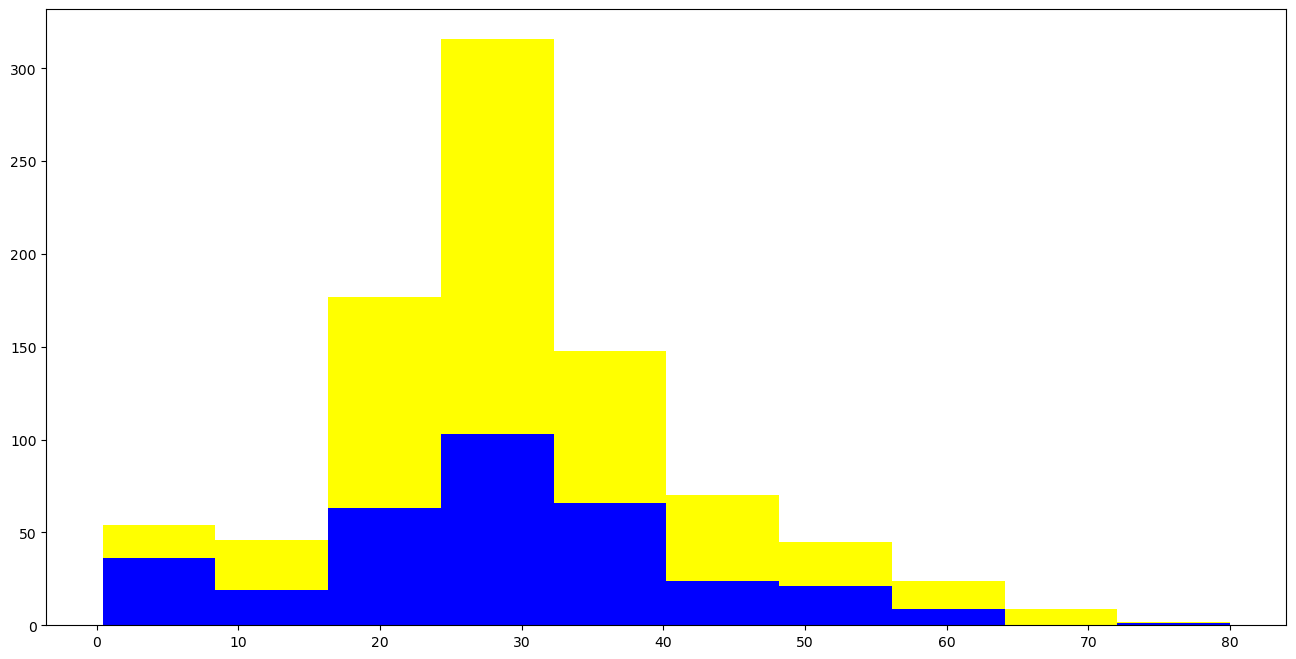

In [37]:
plt.subplots(figsize=(16,8))
plt.hist(df_titanic['Age'], bins=10, color='yellow')
plt.hist(df_titanic_survived['Age'], bins=10, color='blue')
plt.show()

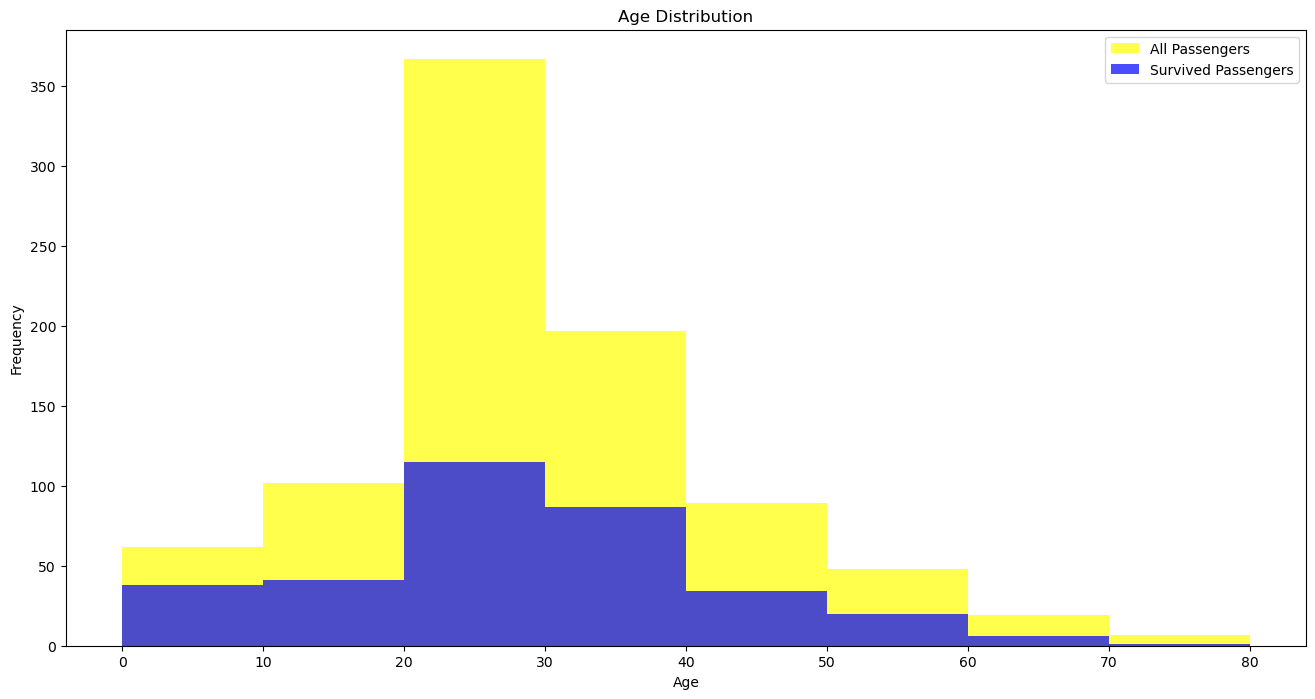

In [38]:
import matplotlib.pyplot as plt

# Assuming df_titanic and df_titanic_survived are defined

# Define bin edges
bins = [i for i in range(0, 81, 10)]

# Create subplots
fig, ax = plt.subplots(figsize=(16, 8))

# Plot histogram for all passengers
ax.hist(df_titanic['Age'], bins=bins, color='yellow', alpha=0.7, label='All Passengers')

# Plot histogram for survived passengers
ax.hist(df_titanic_survived['Age'], bins=bins, color='blue', alpha=0.7, label='Survived Passengers')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution')

# Add legend
ax.legend()

# Show plot
plt.show()


## Create train and validation sets

In [40]:
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']

In [41]:
X = df_titanic[columns]

In [42]:
y=df_titanic['Survived']

In [43]:
train_X, val_X, train_y, val_y =train_test_split(X, y, test_size=.20, random_state=45) 

In [44]:
train_X.shape

(712, 9)

### Training the model


In [45]:
log_reg_model_1 = LogisticRegression() #calling the logistic regression
log_reg_model_1.fit(train_X, train_y) #training the model

C:\Users\srish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
pred_values = log_reg_model_1.predict(val_X) #predicting on validation set

In [47]:
pred_values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [48]:
pred_values.shape

(179,)

In [49]:
acc = accuracy_score(val_y,pred_values)

In [50]:
print('Accuracy of the model is:', round(acc*100,2))

Accuracy of the model is: 84.36


In [51]:
.8436*179

151.0044

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(val_y, pred_values)

In [54]:
cm

array([[103,  14],
       [ 14,  48]], dtype=int64)

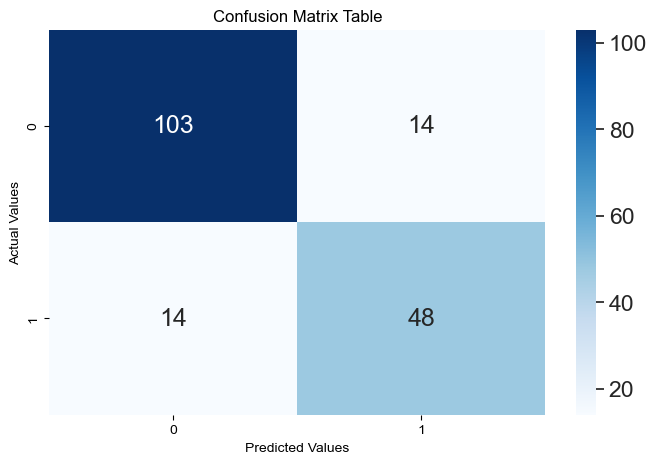

In [55]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=12)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [56]:
### Calculate Accuracy
accuracy = accuracy_score(val_y, pred_values)
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.84


In [57]:
### Calculate Precision
prec = precision_score(val_y, pred_values)
print(f'Precision:{prec:.2f}')

Precision:0.77


In [58]:
### Calculate Recall
recall = recall_score(val_y, pred_values)
print(f'Recall:{recall:.2f}')

Recall:0.77
